In [36]:
pip install statsmodels

     ---------------------------------------- 9.2/9.2 MB 16.7 MB/s eta 0:00:00
     ------------------------------------- 233.8/233.8 kB 14.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm

In [12]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url, index_col=0)

In [13]:
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


# Task 4-1. For the "Median value of owner-occupied homes" provide a boxplot

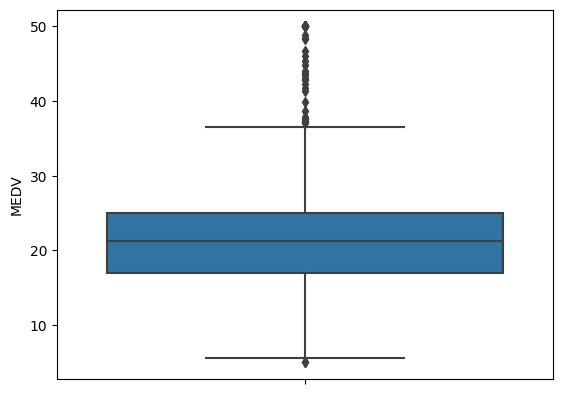

In [16]:
ax = sns.boxplot(y='MEDV', data=boston_df)
plt.show()

# Task 4-2. Provide a  bar plot for the Charles river variable

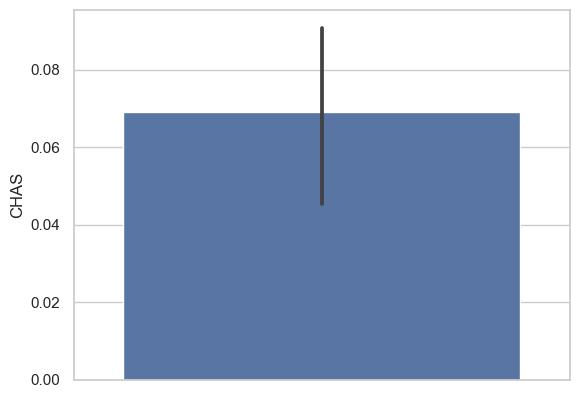

In [17]:
sns.set(style="whitegrid")
ax = sns.barplot(y="CHAS", data=boston_df)
plt.show()

# Task 4-3. Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

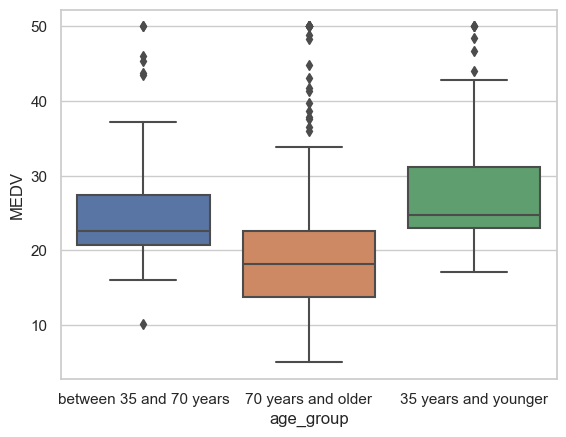

In [21]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'
ax = sns.boxplot(x='age_group', y='MEDV', data=boston_df)
plt.show()

# Task 4-4. Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

Positive relationship


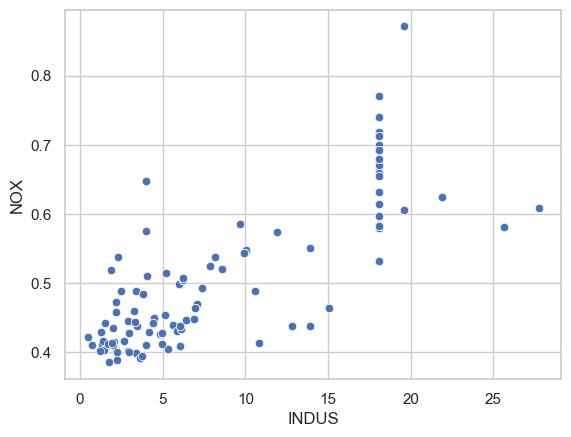

In [23]:
print("Positive relationship")
ax = sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
plt.show()

# Task 4-5. Create a histogram for the pupil to teacher ratio variable

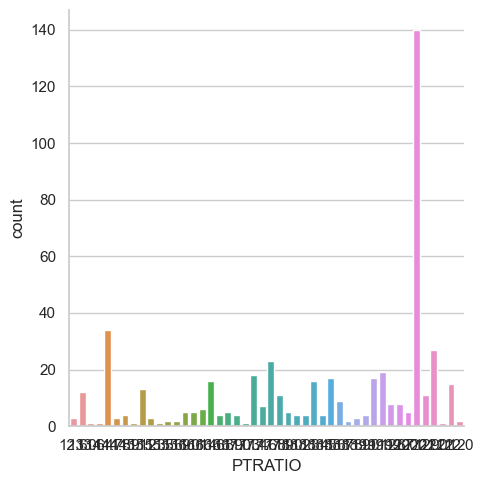

In [24]:
sns.catplot(x='PTRATIO', kind='count', data=boston_df)
plt.show()

# Task 5-1. Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

State the hypothesis

*   $H\_0: µ\_1 = µ\_2$ ("there is no difference in median value of houses bounded ny the Charles river or not")
*   $H\_1: µ\_1 ≠ µ\_2$ ("there is a difference in median value of houses bounded ny the Charles river or not")

In [27]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0]['MEDV'], equal_var = True)

Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)

**Conclusion:** Since the p-value is less than alpha value 0.05, I reject the null hypothesis as there is enough proof that there is a statistical difference in median value of houses bounded by the Charles river or not

# Task 5-2. Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

State the hypothesis

*   $H\_0: µ\_1 = µ\_2 = µ\_3$ (the three MEDV for AGE means are equal)
*   $H\_1:$ At least one of the means differ


In [29]:
# set three MEDV age group values using df columns made in above
lower = boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
middle = boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV']
older = boston_df[boston_df['age_group'] == '70 years and older']['MEDV']

f_statistic, p_value = scipy.stats.f_oneway(lower, middle, older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


**Conclusion:** Since the p-value is less than 0.05, we will reject the null hypothesis as there is significant evidence that at least one of the means differ.


# Task 5-3. Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

State the hypothesis:

*   $H\_0:$ Nitric oxide concentrations is not correlated with proportion of non-retail business acres per town
*   $H\_1:$ Nitric oxide concentrations is correlated with proportion of non-retail business acres per town


In [31]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209157, pvalue=7.913361061233745e-98)

**Conclusion:** Since the p-value  (Sig. (2-tailed)  < 0.05, we reject  the Null hypothesis and conclude that there  exists a relationship between  Nitric oxide concentrations and proportion of non-retail business acres per town.


# Task 5-4. What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

State the hypothesis:

*   $H\_0: $ weighted distance to the five Boston employment centres has no effect on the median value of owner occupied homes
*   $H\_1: $ weighted distance to the five Boston employment centres has an effect on the median value of owner occupied homes

In [39]:
# weighted distance to five Boston employments centres
X = boston_df['DIS']
# median value of owner occupied homes
y = boston_df['MEDV']
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sat, 19 Nov 2022   Prob (F-statistic):           1.21e-08
Time:                        17:06:04   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion:** The p-value is less than the alpha (α) level = 0.05, so we reject the null hypothesis as there is evidence that there is a effect in the median value of owner ocuppied homes based on weighted distance to the five Boston employment centres.